<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [ ]:
# When algorithms randomly generate numbers, 
# it might not be a deterministic process, 
# Hence they are called psuedo RNGs instead (PRNG).

# Numbers will eventually repeat, but modern RNGs take super long before that happens.

### 1.2 NumPy’s PRNG

In [1]:
# Don't I have to import random package? Or numpy have built in. 
np.random.rand()

0.08510693970290273

In [2]:
np.random.rand(10)

array([0.46319723, 0.3216433 , 0.5561191 , 0.05331127, 0.25529188,
       0.9592596 , 0.01710253, 0.95403334, 0.96544945, 0.0423439 ])

In [3]:
np.random.rand(5, 2)

array([[0.14231106, 0.01845938],
       [0.38241835, 0.24955354],
       [0.40159735, 0.27405427],
       [0.59046912, 0.11531203],
       [0.32890135, 0.97775985]])

In [6]:
n = 10000
random_numbers = np.random.rand(n)
np.sum(random_numbers < .5) / n * 100

50.0

In [26]:
n = 10000
random_numbers = np.random.rand(n)
np.sum(random_numbers < .25) / n * 100

24.59

In [27]:
np.sum(random_numbers > .75) / n * 100

24.87

### 1.3 A simple graphical test

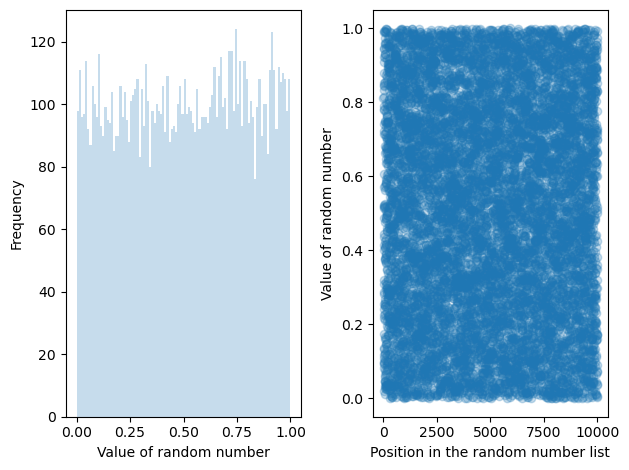

In [40]:
from matplotlib import pyplot as plt

n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows = 1, ncols = 2)

axis = ax[0]
axis.hist(random_numbers, bins = 100, alpha = .25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha = .25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")
plt.tight_layout()
plt.show()

### 1.4 Uniformly beyond \([0,1)\)

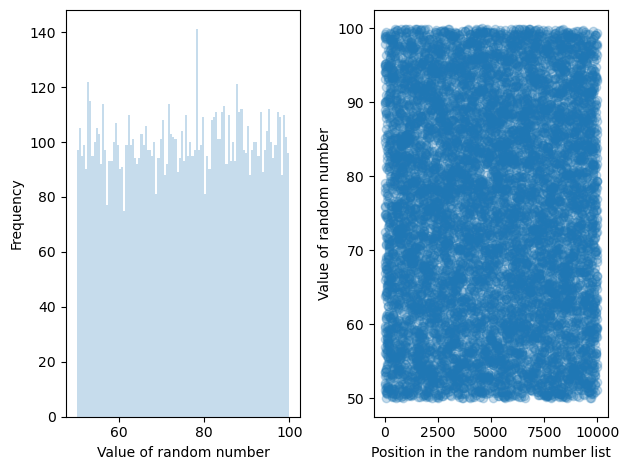

In [34]:
n = 10000
random_numbers = np.random.uniform(low = 50, high = 100, size = n)

fig, ax = plt.subplots(nrows = 1, ncols = 2)

axis = ax[0]
axis.hist(random_numbers, bins = 100, alpha = .25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha = .25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")
plt.tight_layout()
plt.show()

### 1.5 ‘seeding’ a PRNG

In [35]:
np.random.randint(0, 100, 10)

array([21, 50, 31, 99, 17, 43, 31, 83, 63, 68])

In [36]:
np.random.randint(0, 100, 10)

array([93, 95, 45, 76,  3, 62, 19, 38, 36, 59])

In [37]:
np.random.seed(1234)
np.random.randint(0, 100, 10)

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [43]:
np.random.seed(1234)
np.random.randint(0, 100, 10)
# Assuming that I must add the seed before using the randint. 

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [45]:
def shake_magic_8():
    options = ["It is certain.", "It is decidedly so.", 
              "Without a doubt.", "As I see it, yes.",
              "Most likely.", "Outlook good.",
              "Yes.", "Signs point to yes.",
              "Reply hazy, try again.", "Ask again later.",
              "Better not tell you now.", "Cannot predict now.",
              "Concentrate and ask again.", "Don\'t count on it.", 
              "My reply is no.", "My sources say no.",
              "Outlook not so good.", "Very doubtful."]
    return np.random.choice(options)

# np.random.choice returns randomly from an array/list??

In [48]:
questions = ["Will I be pretty?",
            "Will I be rich?",
            "Will I be in trouble?"]

for question in questions:
    print(f"Q: {question}")
    print(f"A: {shake_magic_8()}\n")
    
# \n gives an extra space after every loop cycle. 

Q: Will I be pretty?
A: My sources say no.

Q: Will I be rich?
A: Outlook not so good.

Q: Will I be in trouble?
A: Concentrate and ask again.



## 3 Flipping Coins

### 3.1 A fair coin

In [49]:
np.random.choice(["Head", "Tails"])

'Tails'

In [50]:
no_of_coins = 10
np.random.choice(["Head", "Tails"], no_of_coins)

array(['Head', 'Head', 'Head', 'Tails', 'Tails', 'Tails', 'Head', 'Tails',
       'Tails', 'Head'], dtype='<U5')

In [35]:
def flip_coins(no_of_coins = 1, probability = .5):
    results = np.random.rand(no_of_coins) #Random no. between 0 & 1 for n times. 
    no_of_heads = np.sum(results > probability)  
    return no_of_heads

# Returns the no. of times the results > probability. 

no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f"Number of heads: {no_of_heads/no_of_coins*100:.2f}%") # Gives overall probability. 

Number of heads: 49.90%


### 3.2 A biased coin

In [37]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3) # Lowered as skews the chance for results > probability. 
print(f"Number of heads: {no_of_heads/no_of_coins*100:.2f}%")

Number of heads: 70.40%


### 3.3 A flipping experiment

In [44]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

heads_probability = heads_counts/no_of_repeats

plt.rcParam['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

# Says that matplotlib.pyplot has no attribute "rcParam". 

AttributeError: module 'matplotlib.pyplot' has no attribute 'rcParam'

## Exercise 1 :  12C, 13C

In [170]:
def c13(no_carbon_atoms, probability = 0.9889):
    result = np.random.rand(no_carbon_atoms)
    no_of_c13 = np.sum(result > probability)
    return no_of_c13 

no_of_repeats = 10000
result = [c13(27) for _ in range(no_of_repeats)]
mean = np.average(result)
standard_deviation = np.std(result)
print(mean, standard_deviation)

0.3015 0.544791473868672


In [176]:
def zero_c13(no_c_atoms, repeats, probability = 0.9889):
    result = [c13(no_c_atoms) for _ in range(repeats)]
    total = 0
    for i in result:
        if i == 0:
            total += 1
    return total/repeats
    
zero_c13(27, 10000)

        

0.7336